In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download dataset

# !wget https://data.cityofnewyork.us/api/views/tqtj-sjs8/rows.csv?accessType=DOWNLOAD
# !wget https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD&bom=true&query=select+*
# !wget https://data.cityofnewyork.us/api/views/tqtj-sjs8/rows.csv?accessType=DOWNLOAD

In [3]:
motor_df = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Person.csv')

In [4]:
motor_df.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [5]:
motor_df['PED_LOCATION'].unique()

array([nan, 'Pedestrian/Bicyclist/Other Pedestrian at Intersection',
       'Pedestrian/Bicyclist/Other Pedestrian Not at Intersection',
       'Unknown', 'Does Not Apply'], dtype=object)

In [6]:
missingValue = motor_df.isna().sum().to_frame(name='NaN_number')

In [7]:
missingValue.sort_values('NaN_number',inplace=True,ascending=False)

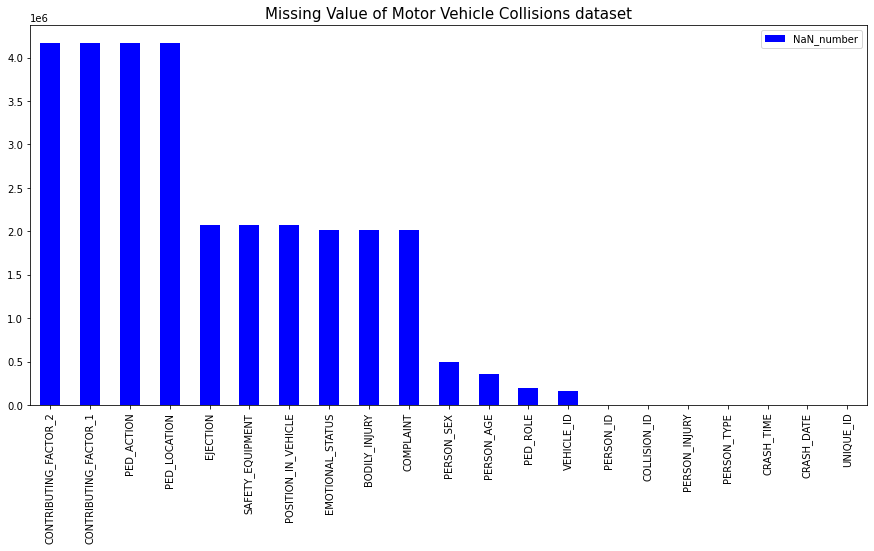

In [8]:
missingValue.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Motor Vehicle Collisions dataset',fontsize=15)
plt.legend()
plt.show()

In [9]:
crash_df = pd.read_csv('./data/Motor_Vehicle_Collisions_-_Crashes.csv',dtype={'BOROUGH':str,'ZIP CODE':str})

In [10]:
crash_df.columns.unique().to_list()

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [11]:
crash_df['CRASH DATE'] = pd.to_datetime(crash_df['CRASH DATE'])
crash_df['CRASH DATE'].sort_values(ascending=False)

50293     2021-03-16
50660     2021-03-16
55054     2021-03-16
56933     2021-03-16
52677     2021-03-16
             ...    
1753106   2012-07-01
1753107   2012-07-01
1761450   2012-07-01
1761456   2012-07-01
1762215   2012-07-01
Name: CRASH DATE, Length: 1763208, dtype: datetime64[ns]

In [12]:
crash_df['dow'] = pd.to_datetime(crash_df['CRASH DATE']).dt.dayofweek
crash_df['day'] = pd.to_datetime(crash_df['CRASH DATE']).dt.day
crash_df['year'] = pd.to_datetime(crash_df['CRASH DATE']).dt.year

In [13]:
crash_df['Killed'] = crash_df['NUMBER OF PERSONS KILLED']+\
                        crash_df['NUMBER OF PEDESTRIANS KILLED']+crash_df['NUMBER OF CYCLIST KILLED']

In [14]:
crash_df['Injured'] = crash_df['NUMBER OF PERSONS INJURED']+\
                        crash_df['NUMBER OF PEDESTRIANS INJURED']+crash_df['NUMBER OF CYCLIST INJURED']

In [15]:
crash_year = crash_df[['year','COLLISION_ID','Killed','Injured']]\
                .groupby('year').agg({'COLLISION_ID':'count','Killed':'sum','Injured':'sum'})\
                .reset_index()\
                .rename(columns={'COLLISION_ID':'Number of Collsion'})

In [16]:
crash_year = crash_year[crash_year['year']!=2021]

In [17]:
crash_year.year

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
8    2020
Name: year, dtype: int64

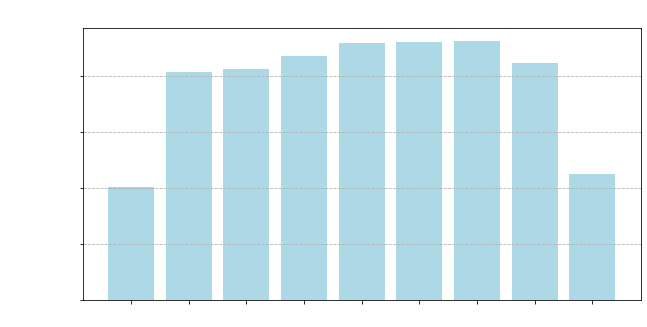

In [18]:
plt.figure(figsize=(10,5))
plt.bar(crash_year.year,crash_year['Number of Collsion'],color='lightblue')
plt.title('Number of Collisions from 2012 to 2020',fontsize=20,color='white')
plt.ylabel('Collisions',fontsize=15,color='white')
plt.xticks(crash_year.year,fontsize=13,color='white')
plt.yticks(fontsize=13,color='white')
plt.grid(linestyle='--',axis='y')
plt.savefig('collisions',dpi=300)
plt.show()

In [19]:
len(crash_year['Number of Collsion'])

9

In [20]:
crash_year['Number of Collsion'].sum()/len(crash_year['Number of Collsion'])

193858.22222222222

In [21]:
crash_year['Injured'].sum()/len(crash_year['Injured'])

67043.0

In [22]:
crash_year['Killed'].sum()/len(crash_year['Killed'])

388.3333333333333

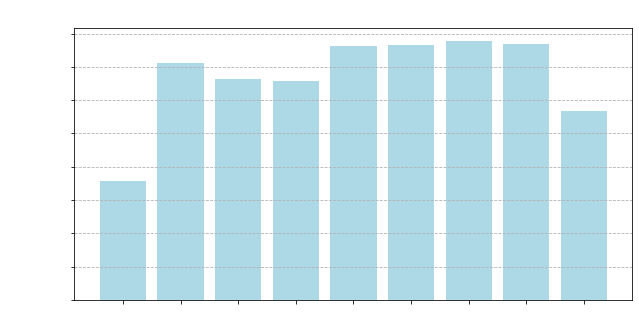

In [23]:
plt.figure(figsize=(10,5))
plt.bar(crash_year.year,crash_year.Injured,color='lightblue')
plt.title('Number of Injuries from 2012 to 2020',fontsize=20,color='white')
plt.ylabel('Injuries',fontsize=15,color='white')
plt.xticks(crash_year.year,fontsize=13,color='white')
plt.yticks(fontsize=13,color='white')
plt.grid(linestyle='--',axis='y')
plt.savefig('injuries',dpi=300)
plt.show()

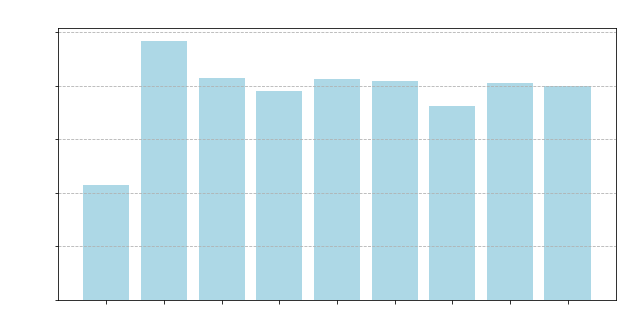

In [24]:
plt.figure(figsize=(10,5))
plt.bar(crash_year.year,crash_year.Killed,color='lightblue')
plt.title('Number of Fatalities from 2012 to 2020',fontsize=20,color='white')
plt.ylabel('Fatalities',fontsize=15,color='white')
plt.xticks(crash_year.year,fontsize=13,color='white')
plt.yticks(fontsize=13,color='white')
plt.grid(linestyle='--',axis='y')
plt.savefig('fatalities',dpi=300)
plt.show()

In [25]:
missing_value_crash = crash_df.isna().sum().to_frame(name='NaN_number')
missing_value_crash.sort_values('NaN_number',inplace=True,ascending=False)

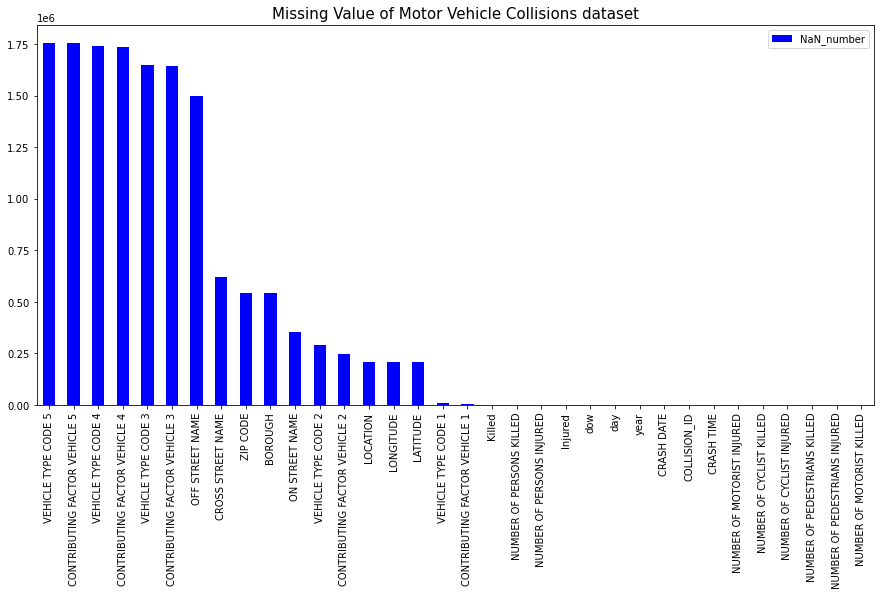

In [26]:
missing_value_crash.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Motor Vehicle Collisions dataset',fontsize=15)
plt.legend()
plt.show()

In [27]:
permit_df = pd.read_csv('./data/Street_Construction_Permits.csv', low_memory=True)

/home/valx/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4,8,14,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
permit_df.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,...,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn
0,Q012007305130,NaN,NaN,NaN,15,DELINQUENT CUTFORM/COMPACTION,1,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,CLOVERDALE BOULEVARD,57 ROAD,59 AVENUE,"FERRANDINO & SON, INC.",MOSY1841,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
1,X042012258017,NaN,NaN,NaN,30,EXPIRED,4,SIDEWALK CONSTRUCTION PERMIT,0401,REPAIR SIDEWALK,...,HOLLAND AVENUE,ALLERTON AVENUE,ARNOW AVENUE,KIANI CONTRACTING INC.,NaN,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,06/22/2018 08:16:47 PM +0000
2,X012010223030,NaN,NaN,NaN,30,EXPIRED,1,STREET OPENING PERMIT,0122,REPAIR GAS,...,MICKLE AVENUE,ADEE AVENUE,ARNOW AVENUE,CONSOLIDATED EDISON,001009673701201008120001000396737,SUBMITTED AS:MICKLE AVENUE ARNOW AVENUE ADEE A...,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
3,X012006219032,NaN,NaN,NaN,30,EXPIRED,1,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,BRONX BOULEVARD,MAGENTA STREET,ROSEWOOD STREET,LAKHI GENERAL CONTRACTOR INC,MOS77841,NaN,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
4,X011999076002,NaN,NaN,NaN,15,DELINQUENT CUTFORM/COMPACTION,1,STREET OPENING PERMIT,0113,REPAIR WATER,...,EAST 165 STREET,GERARD AVENUE,WALTON AVENUE,N.Y.C.WATER MAIN WORKS INC,NaN,NaN,ASPHALT,NaN,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000


In [29]:
permit_df.columns.to_list()

['PermitNumber',
 'ApplicationTrackingID',
 'SequenceNumber',
 'ApplicationTypeShortDesc',
 'PermitStatusID',
 'PermitStatusShortDesc',
 'PermitSeriesID',
 'PermitSeriesShortDesc',
 'PermitTypeID',
 'PermitTypeDesc',
 'PermitNumberOfZones',
 'PermitLinearFeet',
 'PermitTotalSqFeet',
 'PermitEstimatedNumberOfCuts',
 'EquipmentTypeDesc',
 'NumberOfContainers',
 'NumberOfMiniContainers',
 'SpecificStipulations',
 'PreviousPermitNumber',
 'NextPermitNumber',
 'EmergencyIssueDate',
 'PermitIssueDate',
 'IssuedWorkStartDate',
 'IssuedWorkEndDate',
 'BoroughName',
 'PermitHouseNumber',
 'OnStreetName',
 'FromStreetName',
 'ToStreetName',
 'PermitteeName',
 'PermitPurposeComments',
 'PermitLocationComments',
 'PavementShortDesc',
 'SideWalkShortDesc',
 'CreatedOn',
 'ModifiedOn']

In [30]:
permit_df['EmergencyIssueDate']

0                                    NaN
1                                    NaN
2           08/11/2010 12:00:00 AM +0000
3                                    NaN
4           03/17/1999 12:00:00 AM +0000
                        ...             
10407635                             NaN
10407636                             NaN
10407637                             NaN
10407638                             NaN
10407639                             NaN
Name: EmergencyIssueDate, Length: 10407640, dtype: object

In [31]:
permit_df['CreatedOn'].str[0:10]

0           12/14/2013
1           12/14/2013
2           12/14/2013
3           12/14/2013
4           12/14/2013
               ...    
10407635    03/19/2021
10407636    03/19/2021
10407637    12/20/2020
10407638    03/17/2021
10407639    03/17/2021
Name: CreatedOn, Length: 10407640, dtype: object

In [32]:
permit_df['CreatedOn'] = pd.to_datetime(permit_df['CreatedOn'].str[:10])

In [33]:
permit_df['CreatedOn'].sort_values(ascending=True)

0          2013-12-14
6163717    2013-12-14
6163716    2013-12-14
6163715    2013-12-14
6163714    2013-12-14
              ...    
10406741   2021-03-20
10406742   2021-03-20
10406717   2021-03-20
10388529   2021-03-20
10396434   2021-03-21
Name: CreatedOn, Length: 10407640, dtype: datetime64[ns]

In [34]:
permit_df['dow'] = pd.to_datetime(permit_df['CreatedOn']).dt.dayofweek
permit_df['day'] = pd.to_datetime(permit_df['CreatedOn']).dt.day
permit_df['year'] = pd.to_datetime(permit_df['CreatedOn']).dt.year

In [ ]:
permit_year = permit_df[['year','PermitNumber']].groupby('year').count().reset_index()
permit_year.head()

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(crash_year.year,crash_year.Injured,color='lightblue')
plt.title('Number of Injuries from 2012 to 2020',fontsize=20,color='white')
plt.ylabel('Injuries',fontsize=15,color='white')
plt.xticks(crash_year.year,fontsize=13,color='white')
plt.yticks(fontsize=13,color='white')
plt.grid(linestyle='--',axis='y')
plt.savefig('injuries',dpi=300)
plt.show()

In [ ]:
missing_value_permit = permit_df.isna().sum().to_frame(name='NaN_number')
missing_value_permit.sort_values('NaN_number',inplace=True,ascending=False)

In [ ]:
missing_value_permit.plot.bar(color='blue',figsize=(15,7))
plt.title('Missing Value of Street Construction Permit dataset',fontsize=15)
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
#import geopandas as gpd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from datetime import datetime
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
permit_dd = dd.read_csv('./data/Street_Construction_Permits.csv',dtype=str)

In [3]:
permit_dd.head()

,PermitNumber,ApplicationTrackingID,SequenceNumber,ApplicationTypeShortDesc,PermitStatusID,PermitStatusShortDesc,PermitSeriesID,PermitSeriesShortDesc,PermitTypeID,PermitTypeDesc,...,OnStreetName,FromStreetName,ToStreetName,PermitteeName,PermitPurposeComments,PermitLocationComments,PavementShortDesc,SideWalkShortDesc,CreatedOn,ModifiedOn
0,Q012007305130,NaN,NaN,NaN,015,DELINQUENT CUTFORM/COMPACTION,01,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,CLOVERDALE BOULEVARD,57 ROAD,59 AVENUE,"FERRANDINO & SON, INC.",MOSY1841,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
1,X042012258017,NaN,NaN,NaN,030,EXPIRED,04,SIDEWALK CONSTRUCTION PERMIT,0401,REPAIR SIDEWALK,...,HOLLAND AVENUE,ALLERTON AVENUE,ARNOW AVENUE,KIANI CONTRACTING INC.,NaN,NaN,NaN,CONCRETE,12/14/2013 09:03:08 PM +0000,06/22/2018 08:16:47 PM +0000
2,X012010223030,NaN,NaN,NaN,030,EXPIRED,01,STREET OPENING PERMIT,0122,REPAIR GAS,...,MICKLE AVENUE,ADEE AVENUE,ARNOW AVENUE,CONSOLIDATED EDISON,001009673701201008120001000396737,SUBMITTED AS:MICKLE AVENUE ARNOW AVENUE ADEE A...,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
3,X012006219032,NaN,NaN,NaN,030,EXPIRED,01,STREET OPENING PERMIT,0162,NYC PARKS - RECONSTRUCTION CONTRACT,...,BRONX BOULEVARD,MAGENTA STREET,ROSEWOOD STREET,LAKHI GENERAL CONTRACTOR INC,MOS77841,NaN,ASPHALT,CONCRETE,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000
4,X011999076002,NaN,NaN,NaN,015,DELINQUENT CUTFORM/COMPACTION,01,STREET OPENING PERMIT,0113,REPAIR WATER,...,EAST 165 STREET,GERARD AVENUE,WALTON AVENUE,N.Y.C.WATER MAIN WORKS INC,NaN,NaN,ASPHALT,NaN,12/14/2013 09:03:08 PM +0000,12/14/2013 09:03:08 PM +0000


In [4]:
permit_dd['CreatedOn'] = dd.to_datetime(permit_dd['CreatedOn'].str[:10])

In [5]:
permit_dd['CreatedOn'].head()

0   2013-12-14
1   2013-12-14
2   2013-12-14
3   2013-12-14
4   2013-12-14
Name: CreatedOn, dtype: datetime64[ns]

In [6]:
permit_dd['dow'] = dd.to_datetime(permit_dd['CreatedOn']).dt.dayofweek
permit_dd['day'] = dd.to_datetime(permit_dd['CreatedOn']).dt.day
permit_dd['year'] = dd.to_datetime(permit_dd['CreatedOn']).dt.year

In [7]:
permit_year = permit_dd[['year','PermitNumber']].groupby('year').count().reset_index().compute()
permit_year.head()

,year,PermitNumber
0,2013,5905698
1,2020,598685
2,2014,493820
3,2015,550937
4,2016,615565


In [8]:
permit_year.year.unique()

array([2013, 2020, 2014, 2015, 2016, 2017, 2018, 2019, 2021])

In [11]:
permit_year['year']= permit_year[permit_year['year'] != '2021']

In [12]:
permit_year.year.unique()

array([2013., 2020., 2014., 2015., 2016., 2017., 2018., 2019.,   nan])

In [17]:
permit_year = permit_year[0:-1]

In [22]:
permit_year.year=permit_year['year'].astype(str)

In [26]:
permit_year.year = permit_year.year.str[:4]

In [30]:
permit_year = permit_year[1:].sort_values('year')

In [31]:
permit_year

,year,PermitNumber
2,2014,493820
3,2015,550937
4,2016,615565
5,2017,666260
6,2018,728659
7,2019,744664
1,2020,598685


In [35]:
permit_year['PermitNumber']

2    493820
3    550937
4    615565
5    666260
6    728659
7    744664
1    598685
Name: PermitNumber, dtype: int64

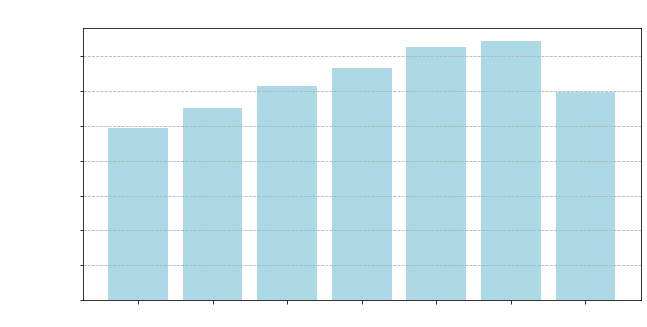

In [37]:
plt.figure(figsize=(10,5))
plt.bar(permit_year.year,permit_year['PermitNumber'],color='lightblue')
plt.title('Number of Construction Permits from 2014 to 2020',fontsize=20,color='white')
plt.ylabel('Number of Permits',fontsize=15,color='white')
plt.xticks(permit_year.year,fontsize=13,color='white')
plt.yticks(fontsize=13,color='white')
plt.grid(linestyle='--',axis='y')
plt.savefig('permits',dpi=300)
plt.show()

In [39]:
permit_year['PermitNumber'].sum()/len(permit_year['PermitNumber'])

628370.0